# Census Income
`Project Description`

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). `The prediction task is to determine whether a person makes over $50K a year.`


##### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.duplicated().sum()

24

<Axes: xlabel='Income', ylabel='count'>

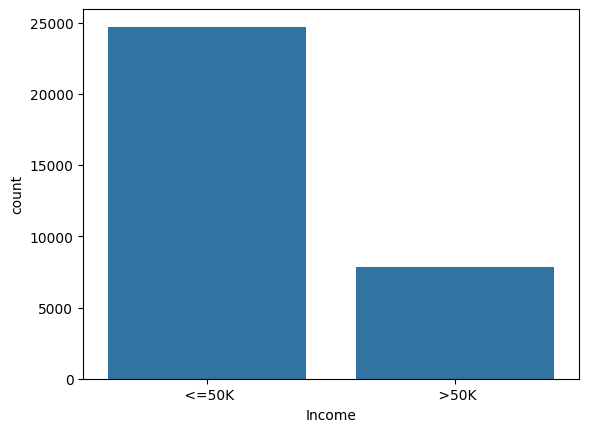

In [7]:
sns.countplot(x = df['Income'])

In [8]:
df.value_counts(df['Income'])/len(df)*100

Income
 <=50K    75.918305
 >50K     24.081695
Name: count, dtype: float64

### Intial observation
- NO missing values
- dupliclate entries exist
- Columns : Workclass, Occupation and Native_country has '?' as multiple entries which needs to be handled
- Imbbalance dataset for learning classification

## Analysis

<Axes: xlabel='Age', ylabel='Count'>

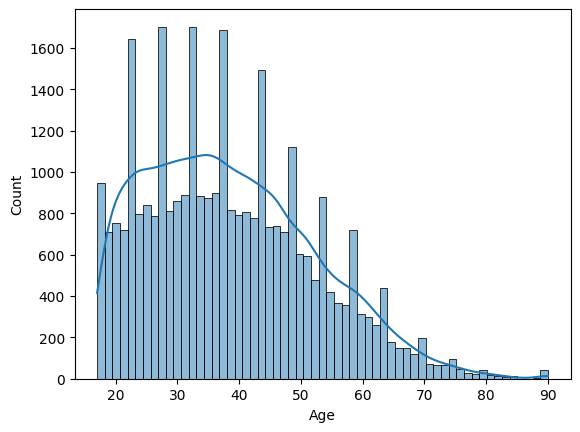

In [9]:
# age Column
sns.histplot(df,x='Age',kde=True)

In [10]:
print('Max age',df['Age'].min())
print('Max Age',df['Age'].max())

Max age 17
Max Age 90


In [11]:
df['Age'].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

<Axes: xlabel='Count', ylabel='Education'>

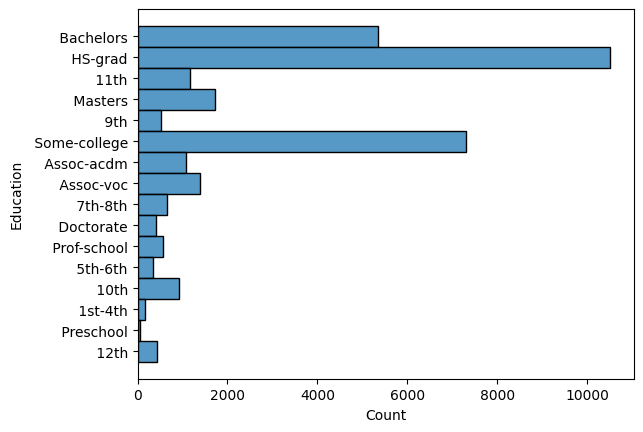

In [12]:
# Education
sns.histplot(y=df['Education'])

Note - We have a good spectrum covered in terms of educational background covered in dataset
- However when we compare the education levels majority of them are HS-grad

In [13]:
# Years of education
df['Education_num'].value_counts()/len(df)*100

Education_num
9     32.251229
10    22.392506
13    16.443489
14     5.291769
11     4.244472
7      3.608722
12     3.277027
6      2.865479
4      1.984029
15     1.769042
5      1.578624
8      1.329853
16     1.268428
3      1.022727
2      0.515971
1      0.156634
Name: count, dtype: float64

Note
- No of people are greater who have gone through 9 years of education

In [14]:
# Race Column
df['Race'].value_counts()/len(df)*100

Race
 White                 85.426904
 Black                  9.594595
 Asian-Pac-Islander     3.191032
 Amer-Indian-Eskimo     0.955160
 Other                  0.832310
Name: count, dtype: float64

Note:
- Data consist of majority of people who are white.

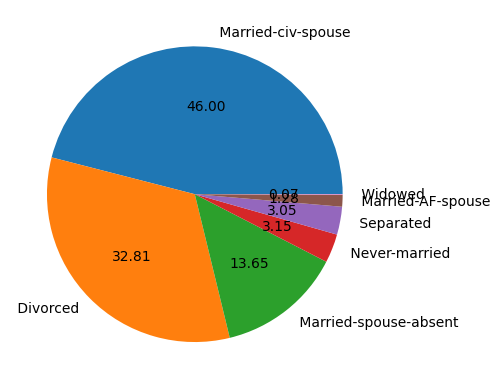

In [15]:
#  Marital_status
plt.pie(df['Marital_status'].value_counts(),labels=df['Marital_status'].unique(),autopct='%0.2f')
plt.show()

Note:
- There are majority of people who are married as compared to who are single 

<Axes: xlabel='count', ylabel='Sex'>

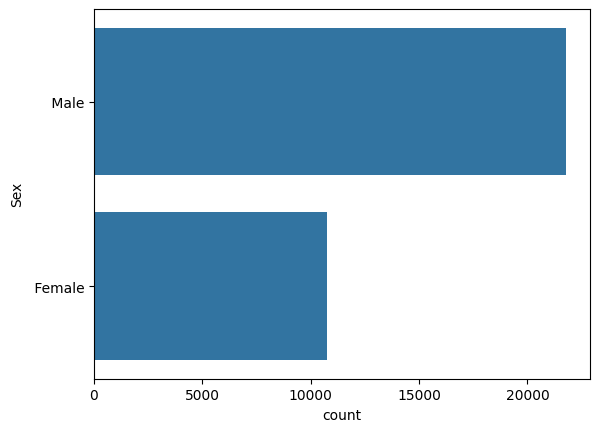

In [16]:
# sex Column
sns.countplot(df['Sex'])

Note :
- More male data than female data

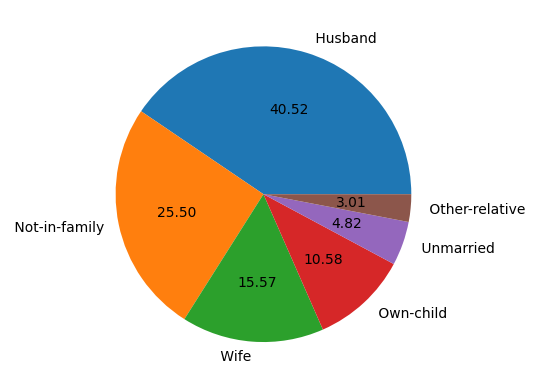

In [17]:
# Relationship column
plt.pie(df['Relationship'].value_counts(),labels=df['Relationship'].unique(),autopct='%0.2f')
plt.show()

<Axes: xlabel='count', ylabel='Occupation'>

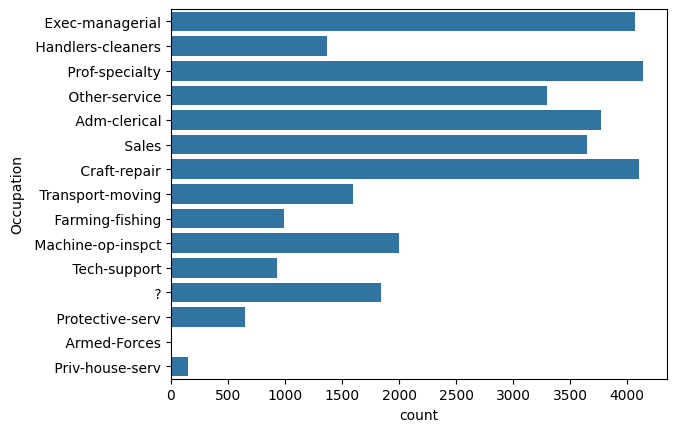

In [18]:
# Occupation column
sns.countplot(df['Occupation'])

<Axes: xlabel='Income', ylabel='count'>

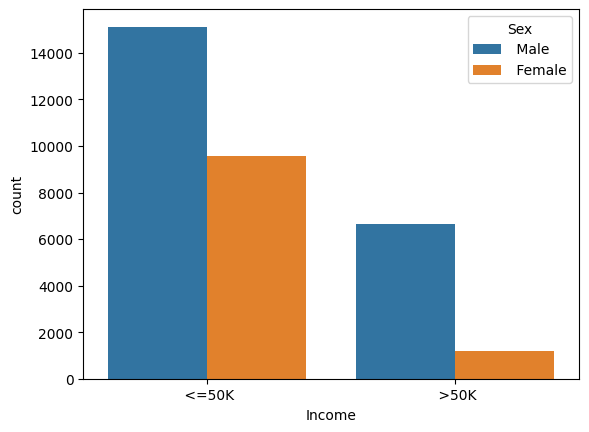

In [19]:
# Lets check what kind of relationship income has with gender
sns.countplot(x='Income',hue='Sex',data=df)

In [20]:
df.groupby('Income')['Sex'].value_counts()

Income  Sex    
 <=50K   Male      15127
         Female     9592
 >50K    Male       6662
         Female     1179
Name: count, dtype: int64

Note:
- Men make more than women in either of the category

<Axes: xlabel='count', ylabel='Race'>

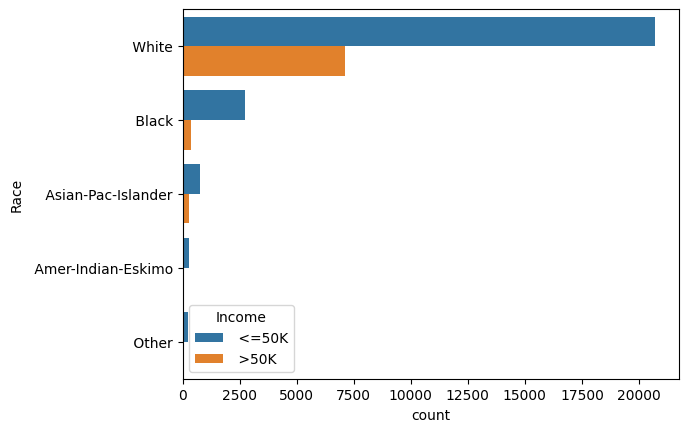

In [21]:
# lets check if race affects income
sns.countplot(y='Race',hue='Income',data=df)

NOte:
- People with white race are more likely to earn more than 50K compared to other races
- But one thing to be kept in mind is data consist of 85% of white people so there may or may not be bias


<Axes: xlabel='Education_num', ylabel='count'>

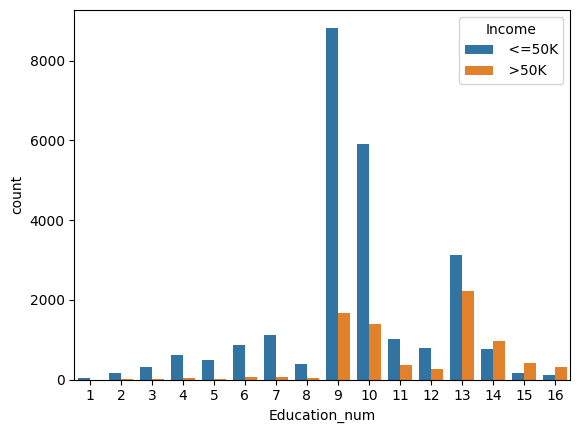

In [22]:
# relationship of income with years of education
sns.countplot(x='Education_num',hue='Income',data=df)

In [23]:
df.groupby('Income')[['Education_num','Education']].value_counts()

Income  Education_num  Education    
 <=50K  9               HS-grad         8826
        10              Some-college    5904
        13              Bachelors       3133
        7               11th            1115
        11              Assoc-voc       1021
        6               10th             871
        12              Assoc-acdm       802
        14              Masters          764
        4               7th-8th          606
        5               9th              487
        8               12th             400
        3               5th-6th          317
        2               1st-4th          162
        15              Prof-school      153
        16              Doctorate        107
        1               Preschool         51
 >50K   13              Bachelors       2221
        9               HS-grad         1675
        10              Some-college    1387
        14              Masters          959
        15              Prof-school      423
        11        

- There are people with 13 years of education with bachelors who are more likely to earn more than 50K

<Axes: xlabel='count', ylabel='Native_country'>

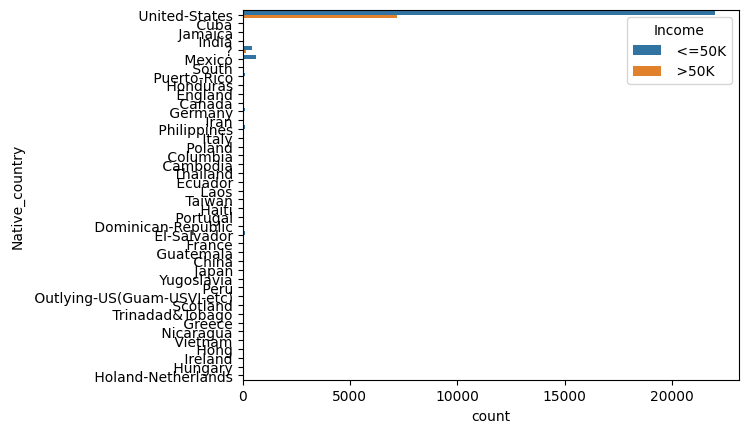

In [24]:
# Lets see if Native_country affect income
sns.countplot(y='Native_country',hue='Income',data=df)

Note:
- US citizen have more income as compared to others

In [25]:
df.corr(numeric_only=True)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


## Data Preprocessing

In [26]:
# Handling ? values with mode values
df.replace('?',np.nan,inplace=True)
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)


In [27]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [28]:
# handling Categorical values
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [30]:
# Selecting revelant columns
x = df.drop('Income', axis=1)
y = df['Income']


from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(x, y)
ExtraTreesClassifier(random_state=42)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))


0 15.36
1 4.45
2 16.52
3 3.56
4 8.98
5 7.33
6 7.48
7 9.46
8 1.45
9 2.7
10 8.84
11 2.77
12 9.36
13 1.74


In [31]:

threshold = 0.05

# fetures needed to be dropped
features_to_drop = np.where(feature_imp < threshold)[0]

print("Features to drop:")
print(features_to_drop)

Features to drop:
[ 1  3  8  9 11 13]


In [32]:
x= x.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

In [33]:
#scaling
from sklearn.preprocessing import StandardScaler
for col in x.columns:
    sc = StandardScaler()
    x[col] = sc.fit_transform(x[col].values.reshape(-1,1))

In [34]:
y.value_counts()/len(y)*100

Income
0    75.918305
1    24.081695
Name: count, dtype: float64

In [35]:
# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [36]:
y.value_counts()/len(y)*100

Income
0    50.0
1    50.0
Name: count, dtype: float64

## Model Training and evaluation

Train data shape:  (39550, 8)
Test data shape:  (9888, 8)
Random Forest Accuracy: 0.8924959546925566
K-Nearest Neighbors Accuracy: 0.8570995145631068
SVM Accuracy: 0.8152305825242718
Decision Tree Accuracy: 0.8511326860841424
Logistic Regression Accuracy: 0.7504045307443366
Naive Bayes Accuracy: 0.6544296116504854


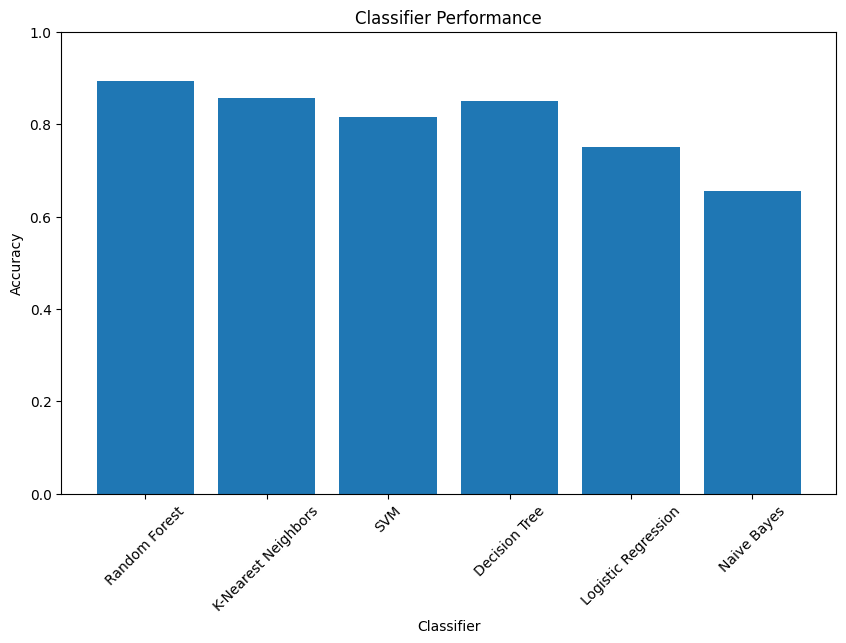

In [37]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier_model = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
} 
classifier_names = []
accuracy_scores = []

for classifier in classifier_model:
    classifier_name=classifier
    model = classifier_model[classifier] 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(classifier_name)
    accuracy_scores.append(accuracy)
    print(f"{classifier_name} Accuracy: {accuracy}")
    

# Plot classifier performance
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()    

In [38]:
from sklearn.model_selection import cross_val_score
for i in range(5):
    cv = cross_val_score(classifier_model['Random Forest'], x, y, cv=5)
    print(f"Cross Validation Score  : {cv.mean()}")

Cross Validation Score  : 0.893504188347747
Cross Validation Score  : 0.8930591943001221
Cross Validation Score  : 0.8930793962880876
Cross Validation Score  : 0.8932615210454184
Cross Validation Score  : 0.89370646394877


## Hyper Parameter Tunning RandomForest Classifier

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Getting the best parameter
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Training with best parameter
best_classifier = RandomForestClassifier(random_state=42, **best_params)
best_classifier.fit(x_train, y_train)

# Predicition
y_pred = best_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score: 0.8879646017699114
Test Accuracy: 0.8929004854368932


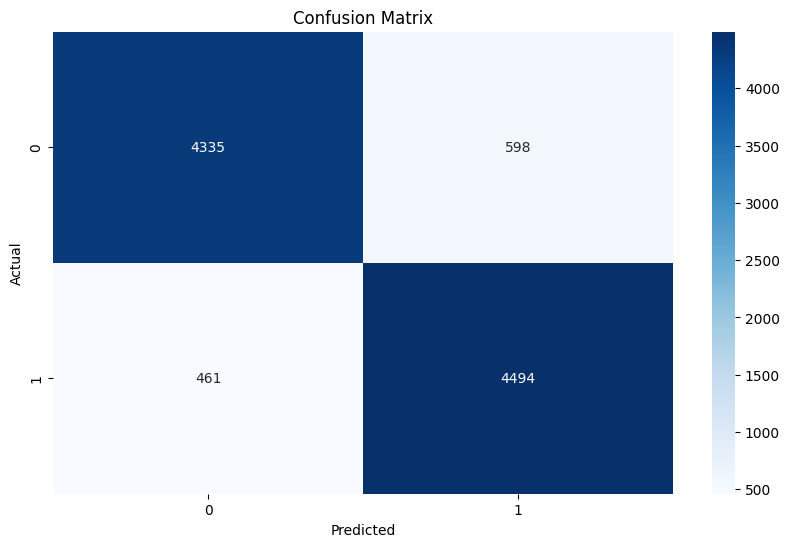

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4933
           1       0.88      0.91      0.89      4955

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



In [40]:
from sklearn.metrics import confusion_matrix,classification_report

# plot confusion matrix 
fig = plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report
report = classification_report(y_test, y_pred)
print(report)


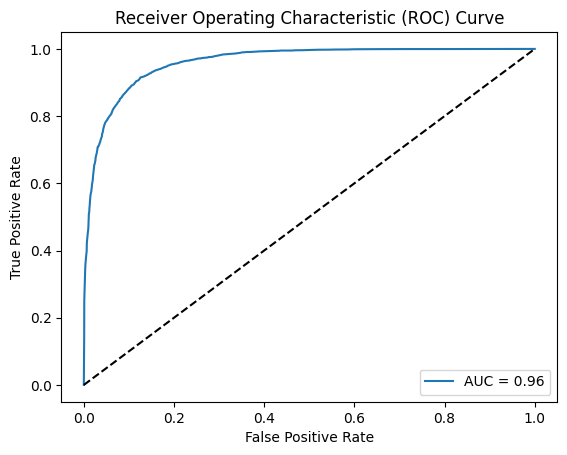

In [42]:
from sklearn.metrics import roc_curve, auc

#  Auc score
y_pred_prob = best_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
# Saving the model
import joblib
joblib.dump(best_classifier,'census_rf_model_classifier.pkl')

['census_rf_model_classifier.pkl']